In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Carga de datos
df = pd.read_csv(r"D:\Users\corsair-guillem\Desktop\Python\kaggle\input\messy-dataset\messy-dataset.csv")

# Revisión de primeras filas
df.head()

,id,name,age,income,city,has_children,num_purchases,signup_date
0,1,Name_1,66.0,47079.946072,Phoenix,False,7.0,2020-04-24
1,2,Name_2,30.0,-99999.000000,Los Angeles,True,6.0,2020-07-27
2,3,Name_3,50.0,56911.056013,Houston,False,1.0,2020-01-14
3,4,Name_4,51.0,58791.584071,Los Angeles,False,17.0,2020-01-09
4,5,Name_5,58.0,27152.586943,Phoenix,False,11.0,2020-02-09


In [3]:
# Revisión dataset completo
df

,id,name,age,income,city,has_children,num_purchases,signup_date
0,1,Name_1,66.0,47079.946072,Phoenix,False,7.0,2020-04-24
1,2,Name_2,30.0,-99999.000000,Los Angeles,True,6.0,2020-07-27
2,3,Name_3,50.0,56911.056013,Houston,False,1.0,2020-01-14
3,4,Name_4,51.0,58791.584071,Los Angeles,False,17.0,2020-01-09
4,5,Name_5,58.0,27152.586943,Phoenix,False,11.0,2020-02-09
...,...,...,...,...,...,...,...,...
95,96,Name_96,72.0,50161.972472,Houston,False,17.0,2020-03-01
96,97,Name_97,59.0,63228.948656,Los Angeles,True,10.0,2020-04-13
97,98,Name_98,68.0,24726.917915,Chicago,True,14.0,2020-02-11
98,99,Name_99,34.0,38780.450153,Chicago,False,17.0,2020-01-25


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   name           100 non-null    object 
 2   age            90 non-null     float64
 3   income         100 non-null    float64
 4   city           100 non-null    object 
 5   has_children   100 non-null    bool   
 6   num_purchases  95 non-null     float64
 7   signup_date    100 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 5.7+ KB


In [5]:
# Queremos cambiar el datatype de las columnas "age" y "num_purchases" a int64
df['age'] = df['age'].fillna(0).astype('int64')
df['num_purchases'] = df['num_purchases'].fillna(0).astype('int64')

# Verificamos el cambio realizado
print("Después del cambio: ", df['age'].dtype)
print("Después del cambio: ", df['num_purchases'].dtype)
print(df)

Después del cambio:  int64
Después del cambio:  int64
     id      name  age        income         city  has_children  \
0     1    Name_1   66  47079.946072      Phoenix         False   
1     2    Name_2   30 -99999.000000  Los Angeles          True   
2     3    Name_3   50  56911.056013      Houston         False   
3     4    Name_4   51  58791.584071  Los Angeles         False   
4     5    Name_5   58  27152.586943      Phoenix         False   
..  ...       ...  ...           ...          ...           ...   
95   96   Name_96   72  50161.972472      Houston         False   
96   97   Name_97   59  63228.948656  Los Angeles          True   
97   98   Name_98   68  24726.917915      Chicago          True   
98   99   Name_99   34  38780.450153      Chicago         False   
99  100  Name_100   22  17917.995278      Phoenix         False   

    num_purchases signup_date  
0               7  2020-04-24  
1               6  2020-07-27  
2               1  2020-01-14  
3            

In [6]:
# Describir las estadísticas básicas
df.describe()

,id,age,income,num_purchases
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,43.390000,43007.540379,9.560000
std,29.011492,22.265567,36577.379006,6.443727
min,1.000000,0.000000,-99999.000000,0.000000
25%,25.750000,27.750000,37763.639865,3.000000
50%,50.500000,47.000000,50193.969098,9.000000
75%,75.250000,63.250000,58569.222486,16.000000
max,100.000000,77.000000,88599.874282,19.000000


In [7]:
# Comprobar valores duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
# Corrección valores atípicos columna "income"
# Existencia de outlier claro con valor -999999. Tomamos la decisión de sustituir los valores -99999 por la mediana
median_income = df['income'].replace(-99999, np.nan).median() #reemplazamos los valores erroneos por NaN para calcular la mediana correcta
df['income'].replace(-99999, median_income, inplace=True) #Reemplazamos -99999 por la mediana


In [9]:
# Corrección valores inconsistentes en columna "city"
# Existencia de valores Unknown (ciudad no especificada). Tomamos la decision de imputar el valor de la moda de la columna a los errores.
moda_city = df['city'].mode()[0] #Calculamos la moda
df['city'].replace('Unknown', moda_city, inplace=True) #Reemplazamos Unknown por la moda

In [10]:
# Correción valores inconsistentes en columna "has_childern"
# Existencia de valor MAYBE cuando se espera un valor de tipo bool (True/False). Tomamos la decision de imputar el valor False a los errores.
df['has_children'].replace('Maybe', False, inplace=True)

In [11]:
# Limpieza del dataset finalizada, comprobamos primeras filas
df.head()

,id,name,age,income,city,has_children,num_purchases,signup_date
0,1,Name_1,66,47079.946072,Phoenix,False,7,2020-04-24
1,2,Name_2,30,50624.979007,Los Angeles,True,6,2020-07-27
2,3,Name_3,50,56911.056013,Houston,False,1,2020-01-14
3,4,Name_4,51,58791.584071,Los Angeles,False,17,2020-01-09
4,5,Name_5,58,27152.586943,Phoenix,False,11,2020-02-09


In [12]:
# Revisión de dataset limpio
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   name           100 non-null    object 
 2   age            100 non-null    int64  
 3   income         100 non-null    float64
 4   city           100 non-null    object 
 5   has_children   100 non-null    bool   
 6   num_purchases  100 non-null    int64  
 7   signup_date    100 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 5.7+ KB


,id,age,income,num_purchases
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,43.390000,50538.739329,9.560000
std,29.011492,22.265567,15832.596148,6.443727
min,1.000000,0.000000,17917.995278,0.000000
25%,25.750000,27.750000,40161.182973,3.000000
50%,50.500000,47.000000,50624.979007,9.000000
75%,75.250000,63.250000,58569.222486,16.000000
max,100.000000,77.000000,88599.874282,19.000000


In [13]:
# Observamos que tenemos como valor minimo en age = 0 y num_purchases = 0 (no se han eliminado las filas con valores nulos como pretendiamos)
# La ejecución de celda [5] rellenó los valores Null con 0. Corregimos y anulamos las filas con valores = 0.
numeric_cols = df.select_dtypes(include=['number']).columns
df = df[(df[numeric_cols] != 0).all(axis=1)]
print(df)

     id      name  age        income         city  has_children  \
0     1    Name_1   66  47079.946072      Phoenix         False   
1     2    Name_2   30  50624.979007  Los Angeles          True   
2     3    Name_3   50  56911.056013      Houston         False   
3     4    Name_4   51  58791.584071  Los Angeles         False   
4     5    Name_5   58  27152.586943      Phoenix         False   
..  ...       ...  ...           ...          ...           ...   
95   96   Name_96   72  50161.972472      Houston         False   
96   97   Name_97   59  63228.948656  Los Angeles          True   
97   98   Name_98   68  24726.917915      Chicago          True   
98   99   Name_99   34  38780.450153      Chicago         False   
99  100  Name_100   22  17917.995278      Phoenix         False   

    num_purchases signup_date  
0               7  2020-04-24  
1               6  2020-07-27  
2               1  2020-01-14  
3              17  2020-01-09  
4              11  2020-02-09  
.. 

In [14]:
# Revisión de dataset limpio (segunda comprobación)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             86 non-null     int64  
 1   name           86 non-null     object 
 2   age            86 non-null     int64  
 3   income         86 non-null     float64
 4   city           86 non-null     object 
 5   has_children   86 non-null     bool   
 6   num_purchases  86 non-null     int64  
 7   signup_date    86 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 5.5+ KB


,id,age,income,num_purchases
count,86.000000,86.000000,86.000000,86.000000
mean,52.755814,48.627907,50038.330552,9.627907
std,29.227278,17.486833,15226.803845,6.262956
min,1.000000,18.000000,17917.995278,1.000000
25%,27.750000,34.000000,40626.007702,4.000000
50%,53.500000,50.500000,50624.979007,8.500000
75%,77.750000,65.000000,57533.370268,16.000000
max,100.000000,77.000000,88599.874282,19.000000


In [15]:
# Guardamos el dataset limpio
df.to_csv('clean-dataset.csv', index=False)

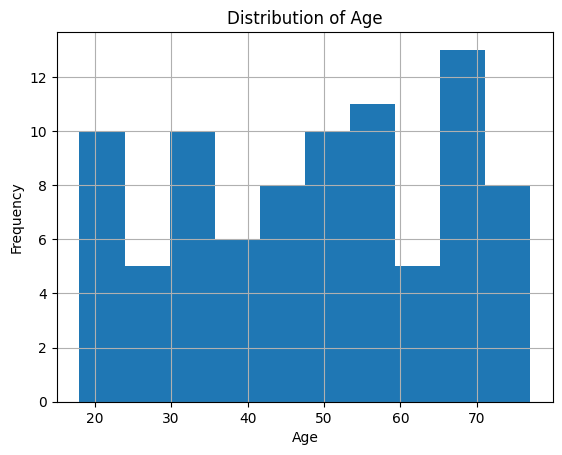

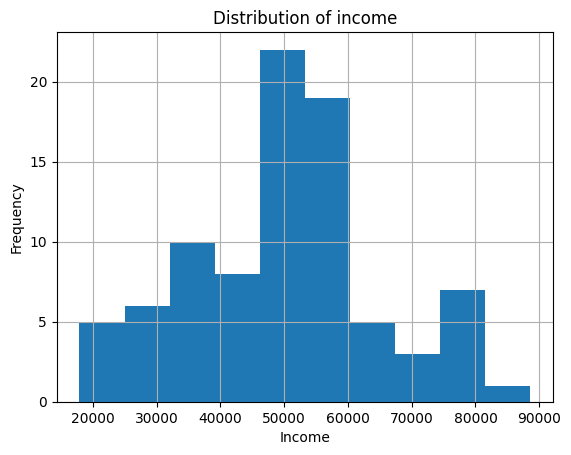

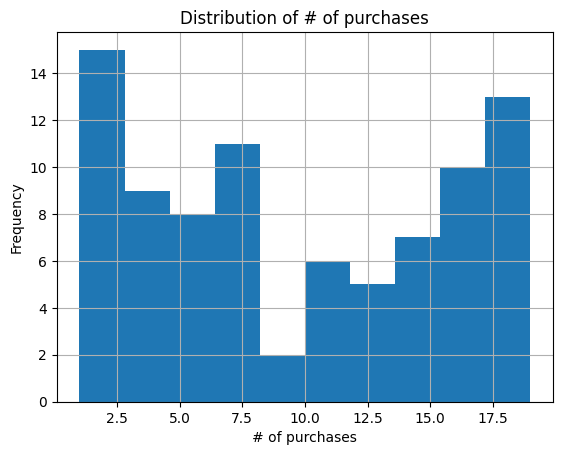

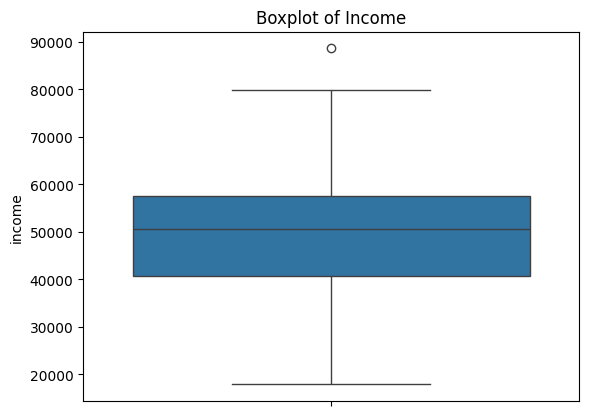

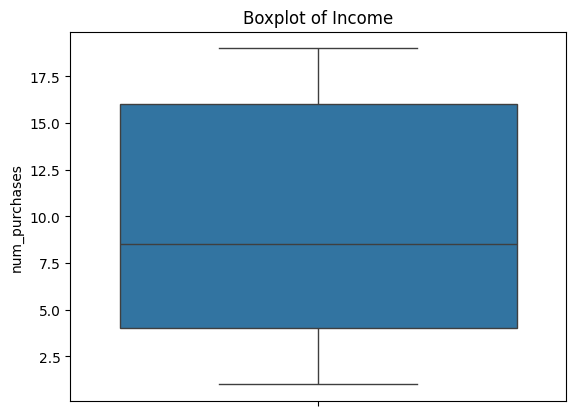

In [23]:
# EDA ANALYSIS
# 1. Distribución de variables numéricas

# 1.1 Histograma para distribución de variables numéricas (age, income, num_purchases)
df['age'].hist(bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

df['income'].hist(bins=10)
plt.title('Distribution of income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

df['num_purchases'].hist(bins=10)
plt.title('Distribution of # of purchases')
plt.xlabel('# of purchases')
plt.ylabel('Frequency')
plt.show()

# 1.2 Diagrama de caja para observar dispersión de datos para "income" y "num_purchases"
sns.boxplot(y=df['income'])
plt.title('Boxplot of Income')
plt.show()

sns.boxplot(y=df['num_purchases'])
plt.title('Boxplot of Income')
plt.show()

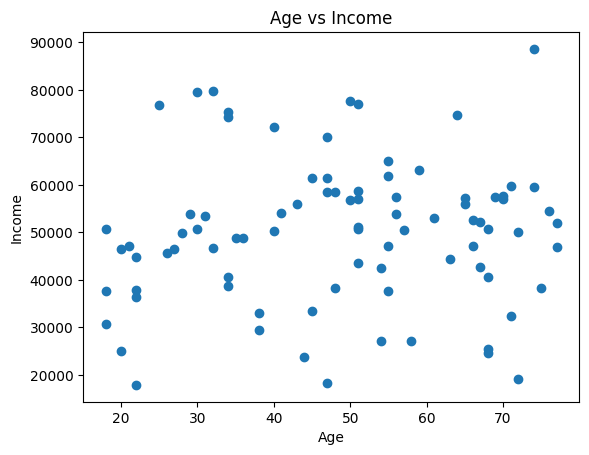

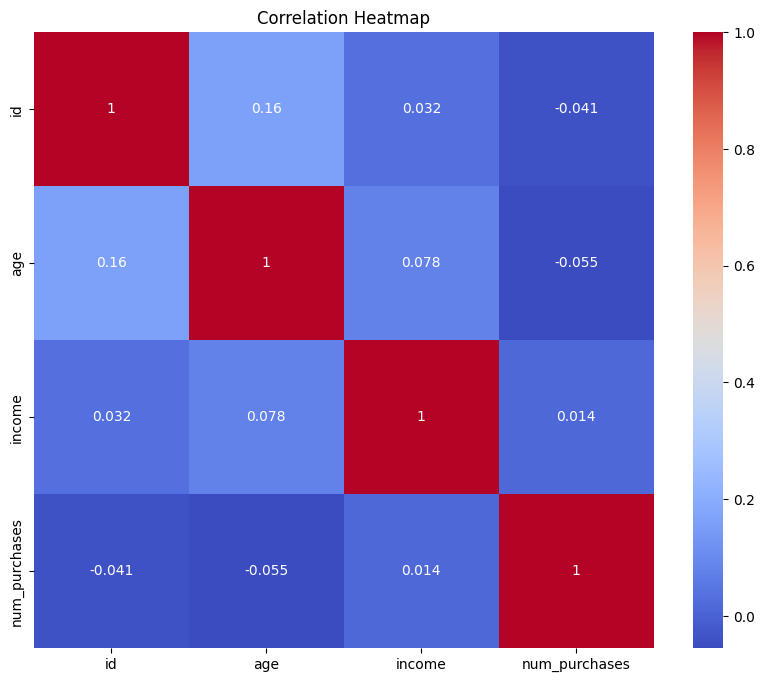

In [17]:
# 2. Relación entre variables numéricas
# 2.1 Diagrama de dispersión entre "age" e "income" para comprobar la existencia de alguna correlación entre la edad y los ingresos
plt.scatter(df['age'], df['income'])
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# 2.2 Heatmap de correlación para mostrar las correlaciones entre todas las variables numéricas e identificar cuáles están correlacionadas entre sí.
df_numeric = df.select_dtypes(include=['number']) #Seleccionamos solamente columnas numéricas

plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


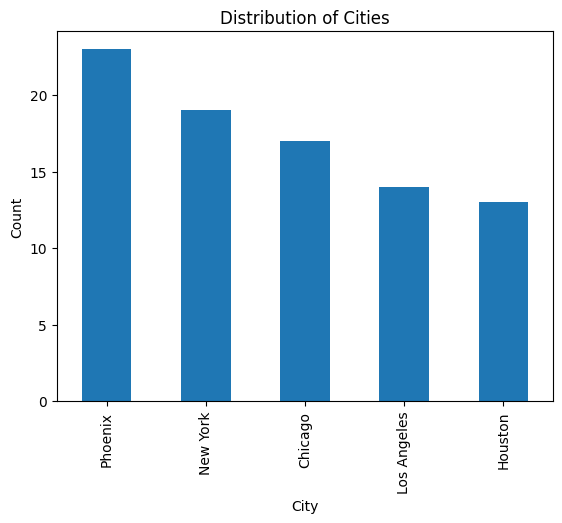

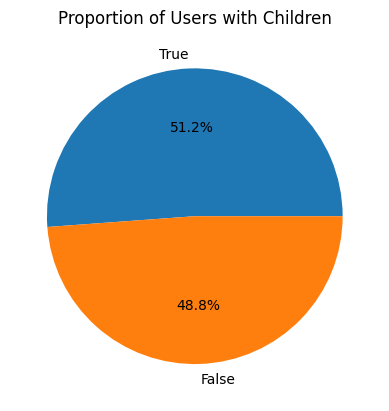

In [18]:
# 3. Distribución de variables categóricas
# 3.1 Gráfico de barras. Visualizaremos la distribución de "city" y "has_childern".
df['city'].value_counts().plot(kind='bar')
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

# 3.2 Gráfico Circular. Una forma diferente de visualizar la distribución de "has_children".
df['has_children'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Users with Children')
plt.ylabel('')
plt.show()


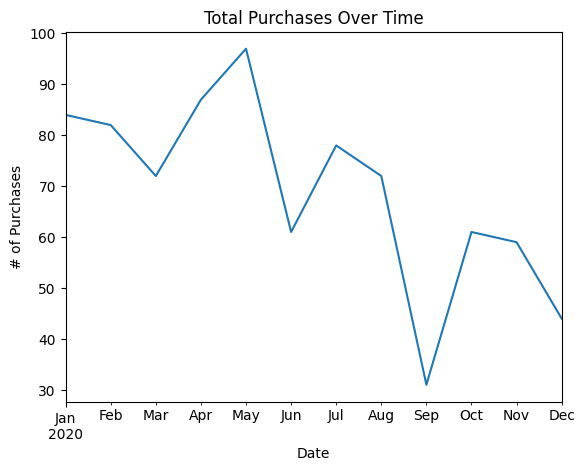

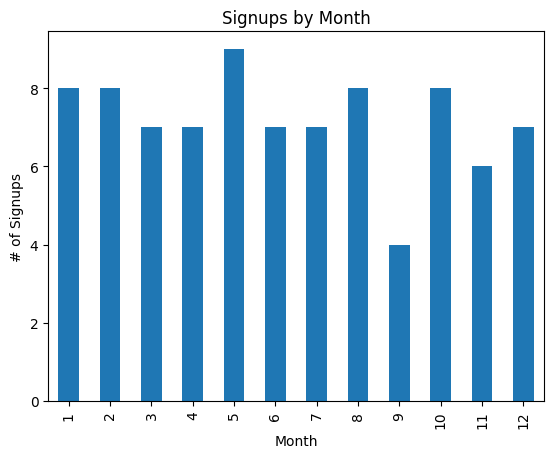

In [25]:
# 4. Distribución temporal
# 4.1 Gráfico de líneas. Comprobamos el total de compras en el tiempo.
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.set_index('signup_date')['num_purchases'].resample('M').sum().plot()
plt.title('Total Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('# of Purchases')
plt.show()

# 4.2 Histograma con fechas. Vemos la distribución de registros por mes o año.
df['signup_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('# of Signups')
plt.show()


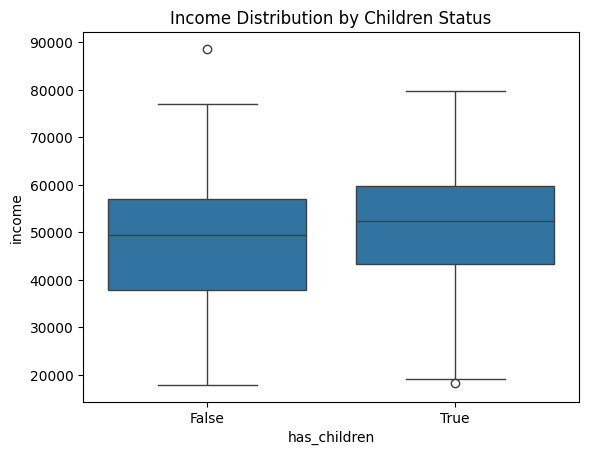

In [20]:
# 5. Gráfico de caja filtrado por categoría. Distribución de "income" entre personas con y sin hijos.
sns.boxplot(x='has_children', y='income', data=df)
plt.title('Income Distribution by Children Status')
plt.show()


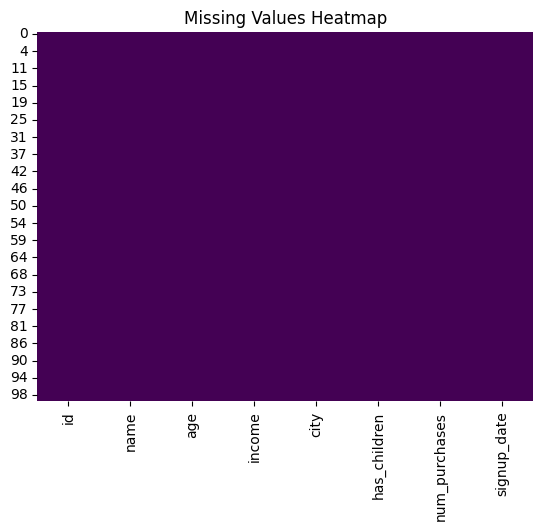

In [21]:
# 6. Análisis de valores faltantes o anómalos
# 6.1 Heatmap de valores falantes (a pesar de que hemos corregido el dataset)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
